In [29]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [30]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/ducanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ducanh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ducanh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/ducanh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import re
import string
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def word_process(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_text)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_text)

def convert_sentiment(data):
    data['sentiment'] = data['sentiment'].replace({'positive': 2, 'negative': 0, 'neutral': 1})
    return data

def preprocess_data(data_path):
    data = pd.read_csv(data_path, encoding='ISO-8859-1')
    data = data[['text', 'sentiment']]
    data = data.dropna().drop_duplicates()
    data['text'] = data['text'].astype(str)
    data['text'] = data['text'].replace('nan', np.nan)
    data = data.dropna(subset=['text'])
    data['text'] = data['text'].apply(word_process)
    data['text'] = data['text'].apply(remove_stopwords)
    data['text'] = data['text'].apply(lemmatize_text)
    data = convert_sentiment(data)

    data['text'] = data['text'].str.strip()
    data = data[data['text'] != '']
    
    return data



[nltk_data] Downloading package punkt to /home/ducanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ducanh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ducanh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
train_data = preprocess_data('data/train.csv')
train_data.to_csv('data/processed_train.csv', index=False)
test_data = preprocess_data('data/test.csv')
test_data.to_csv('data/processed_test.csv', index=False)

/tmp/ipykernel_1639551/2714745129.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace({'positive': 2, 'negative': 0, 'neutral': 1})
/tmp/ipykernel_1639551/2714745129.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace({'positive': 2, 'negative': 0, 'neutral': 1})


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27390 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27390 non-null  object
 1   sentiment  27390 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 642.0+ KB


<Axes: title={'center': 'Sentiment distribution in train data'}, xlabel='sentiment'>

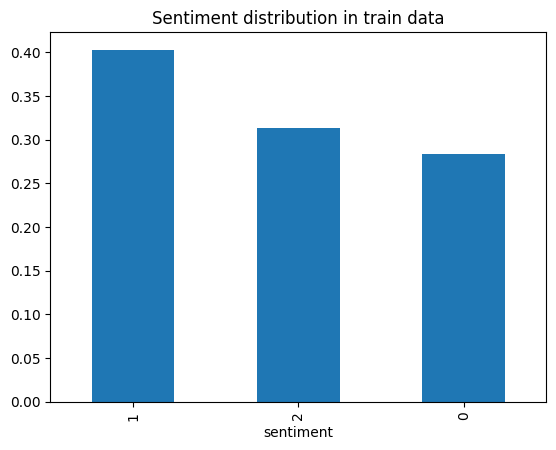

In [34]:
train_data['sentiment'].value_counts(normalize=True).plot(kind='bar', title='Sentiment distribution in train data')